In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from keras.layers import Embedding
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import accuracy_score

In [2]:
#loading the data
data = pd.read_csv('/content/drive/MyDrive/DL Projects/Classification Projects/RNN/Fake News Classification/data/processsed.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19264 entries, 0 to 19263
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   title              19264 non-null  object
 1   label              19264 non-null  int64 
 2   lang               19264 non-null  object
 3   exp_title          19264 non-null  object
 4   preprocessed_text  19260 non-null  object
dtypes: int64(1), object(4)
memory usage: 752.6+ KB


In [3]:
#removing unnecessary and null columns
data = data.drop(['title','lang','exp_title'], axis=1)
data.dropna(subset=['preprocessed_text'], inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19260 entries, 0 to 19263
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   label              19260 non-null  int64 
 1   preprocessed_text  19260 non-null  object
dtypes: int64(1), object(1)
memory usage: 451.4+ KB


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


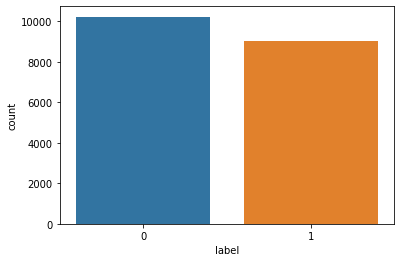

In [4]:
#checking the class balance
sns.countplot(data['label']) #almost balanced

In [5]:
#splitting the data into train and test
df = data.sample(frac=1)
size = int(len(data)*0.7)
train = data[:size]
test = data[size:]
print(train.shape, test.shape)

(13482, 2) (5778, 2)


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


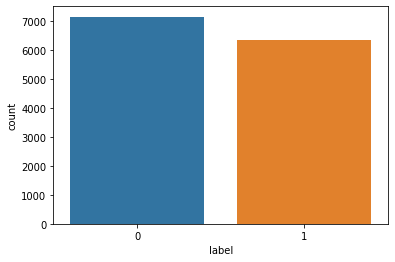

In [6]:
#checking the class balance
sns.countplot(train['label']) #almost balanced

In [7]:
#converting the training text to numbers
tok = Tokenizer()
tok.fit_on_texts(train['preprocessed_text'])
sequences = tok.texts_to_sequences(train['preprocessed_text'])
padded_train = pad_sequences(sequences, padding='post', maxlen=30)
print(padded_train.shape)

(13482, 30)


In [8]:
#default parameters
voc_size = len(tok.word_index)+1
embedding_dim = 64

#model creation
model = Sequential()
model.add(Embedding(voc_size, embedding_dim, input_length=30))
model.add(SimpleRNN(128))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 64)            926336    
                                                                 
 simple_rnn (SimpleRNN)      (None, 128)               24704     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 951,169
Trainable params: 951,169
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(padded_train, train['label'], epochs=10, batch_size=64)

Epoch 1/10
211/211 [==============================] - 14s 54ms/step - loss: 0.2840 - accuracy: 0.8839
Epoch 2/10
211/211 [==============================] - 12s 58ms/step - loss: 0.0958 - accuracy: 0.9687
Epoch 3/10
211/211 [==============================] - 6s 28ms/step - loss: 0.0393 - accuracy: 0.9873
Epoch 4/10
211/211 [==============================] - 7s 35ms/step - loss: 0.0252 - accuracy: 0.9915
Epoch 5/10
211/211 [==============================] - 8s 40ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 6/10
211/211 [==============================] - 12s 59ms/step - loss: 0.0087 - accuracy: 0.9967
Epoch 7/10
211/211 [==============================] - 9s 43ms/step - loss: 0.0071 - accuracy: 0.9976
Epoch 8/10
211/211 [==============================] - 8s 38ms/step - loss: 0.0273 - accuracy: 0.9911
Epoch 9/10
211/211 [==============================] - 7s 33ms/step - loss: 0.0129 - accuracy: 0.9959
Epoch 10/10
211/211 [==============================] - 6s 27ms/step - loss: 0.0033 - acc

In [12]:
#converting test data to numbers
tok = Tokenizer()
tok.fit_on_texts(test['preprocessed_text'])
sequences = tok.texts_to_sequences(test['preprocessed_text'])
padded_test = pad_sequences(sequences, padding='post', maxlen=30)
print(padded_test.shape)

(5778, 30)


In [13]:
model.evaluate(padded_test,test['label'])

181/181 [==============================] - 3s 11ms/step - loss: 1.1666 - accuracy: 0.8214


[1.1666077375411987, 0.8213914632797241]